----------------1. Load data-------------------
----------------2. Parameter setting------------
----------------3.LARGE-----------------
----------------Count of iterations----------------1
[[ 2.25117088  4.70051273]
 [ 6.2581988   5.56006854]
 [ 1.57293609  1.78735262]
 [ 0.61256672  4.06168572]
 [ 4.58689276  3.99286352]
 [ 1.99636983  5.42842447]
 [-1.37408536  6.34417089]
 [ 3.64272753  6.35943238]
 [ 2.08152198  6.63000185]
 [-0.73620635  5.32010308]
 [ 0.79481999  5.75211575]
 [ 0.27054148  5.16203833]
 [-0.37441055  5.61238792]
 [10.21273168  4.59170662]
 [ 1.82678049  4.3187389 ]
 [ 1.42098881  3.31037053]
 [ 4.67358207  4.16078476]
 [ 5.60080157  6.39445472]
 [ 5.2460333   1.48506132]
 [ 3.37372847  6.4204681 ]
 [ 1.34238037  5.85664818]
 [ 0.49023491  3.28624716]
 [ 3.61212505  6.69152219]
 [ 2.05654345  5.88453376]
 [ 1.27919     7.30725248]
 [ 5.5763798   8.33022325]
 [ 3.12765317  5.0645422 ]
 [-5.03114666  3.87784521]
 [ 2.6442915   2.91276077]
 [ 2.13277317  3.88911353]

----------------Count of iterations----------------8
[[1.23156605 5.45523012]
 [1.2857789  4.79107178]
 [1.19744919 4.73763213]
 [1.24068409 4.9478141 ]
 [1.46842236 4.55843344]
 [1.22286219 4.44479767]
 [1.26153598 5.14481779]
 [1.16114979 4.86626338]
 [1.45447443 4.68289484]
 [1.39010968 4.31042503]
 [1.33891923 4.31971627]
 [1.32259648 3.88039292]
 [1.30603976 4.14502632]
 [1.30403857 4.00562137]
 [1.21950231 4.73040699]
 [1.3177285  4.49305378]
 [1.20972671 4.59771609]
 [1.31257264 4.31213831]
 [1.22576518 4.09405565]
 [1.20230691 4.53556002]
 [1.22493328 4.01510998]
 [1.33269948 4.07545501]
 [1.23266158 4.86507146]
 [1.32451022 4.60331966]
 [1.40672062 4.32325581]
 [1.45568238 4.48007991]
 [1.5388976  4.83098015]
 [1.36524083 4.47342517]
 [1.30116247 4.52088781]
 [1.21276025 4.4521594 ]
 [1.31226266 4.0928158 ]
 [1.29458363 4.24463419]
 [1.25058608 3.82206901]
 [1.36540692 4.48749001]
 [1.36720877 4.18194855]
 [1.4375763  4.80571186]
 [1.40388747 4.757079  ]
 [1.22158822 4.6082674

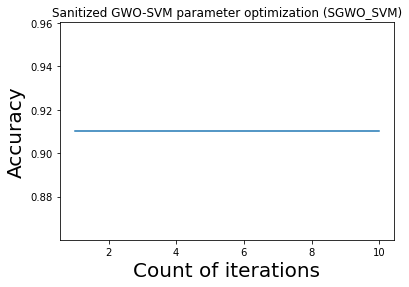

SVC RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY GRAY WOLF OPTIMIZATION
RMSE = 0.29029237489356885
MSE = 0.08426966292134831
Normalized RMSE= 0.29029237489356885
R Square = -0.5892857142857142
K-fold accuracy mean 0.9435814889336015
Test Accuracy: 0.9157303370786517
Confusion Matrix: [[161   7]
 [  8   2]]
Training time: 0.0049974918365478516s


In [10]:
# -*- coding: utf-8 -*-
"""
Created on Thursday May 22,2020
@author: BHASKAR TRIPATHI

Sanitized-GWO-SVR.
This code Optimizes a Support Vector machine by using Grey Wolf Optimizer with 
Time varying acceleration coefficients and applying difference mean based perturbation. 
The original algorithm of GWO was developed by Dr Ali Mirjalili in Matlab. 
I was inspired by his method and Hybridized it with an SVR objective function (or SVC depending upon what you need). 
Intution - https://www.youtube.com/watch?v=B3jqn9lCNxI

"""
# -*- coding: utf-8 -*-

import numpy as np
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection
import numpy.random as rd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings, pandas as pd,numpy as np, time, math, configparser,random


## 1. GWO optimization algorithm
def sanitized_gwo(X_train,X_test,y_train,y_test,SearchAgents_no,T,dim,lb,ub):
    Alpha_position=[0,0] # Initialize the position of Alpha Wolf
    Beta_position=[0,0]
    Delta_position=[0,0]  

    Alpha_score = float("inf") # Initialize the value of Alpha Wolf's objective function 
    Beta_score = float("inf")
    Delta_score = float("inf")
 
    Positions = np.dot(rd.rand(SearchAgents_no,dim),(ub-lb))+lb # initialize the first search position
    
    Convergence_curve=np.zeros((1,T))# initialization fusion curve

    iterations = []
    accuracy = []

    # Main Loop
    t = 0 
    while t < T:
        
        # Iterate over each wolf
        for i in range(0,(Positions.shape[0])):
            #If the search position exceeds the search space, you need to return to the search space 
            for j in range(0,(Positions.shape[1])): 
                Flag4ub=Positions[i,j]>ub
                Flag4lb=Positions[i,j]<lb
                #If the wolf's position is between the maximum and minimum, the position does not need to be adjusted,
                #if it exceeds the maximum, the maximum returns to the maximum value boundary

                if Flag4ub:                   
                    Positions[i,j] = ub
                if Flag4lb:                   
                    Positions[i,j] = lb
            '''SVM MODEL TRAINING - FOR CLASSIFICATION PROBLEM DATASET''' 
            dt_classifier = DecisionTreeClassifier() 
            rbf_svm = dt_classifier.fit(X_train, y_train)  #svm
            cv_accuracies = cross_val_score(rbf_svm,X_test,y_test,cv =3,scoring = 'accuracy')
            
            '''SVR MODEL TRAINING - FOR REGRESSION PROBLEM DATASET'''
            #rbf_regressor = svm.SVR(kernel = 'rbf', C = Positions[i][0], gamma = Positions[i][1]).fit(X_train, y_train)  #svm        
            #cv_accuracies = cross_val_score(rbf_regressor,X_test,y_test,cv =3,scoring = 'neg_mean_squared_error') # Taking negated value of MSE
            
            
            #To minimize the error rate
            accuracies = cv_accuracies.mean()            
            fitness_value = (1 - accuracies)*100
            if fitness_value<Alpha_score: # If the objective function value is less than the objective function value of Alpha Wolf
                Alpha_score=fitness_value # Then update the target function value of Alpha Wolf to the optimal target function value
                Alpha_position=Positions[i] # At the same time update the position of the Alpha wolf to the optimal position
            if fitness_value>Alpha_score and fitness_value<Beta_score:  # If the objective function value is between the objective function value of Alpha Wolf and Beta Wolf
                Beta_score=fitness_value # Then update the target function value of Beta Wolf to the optimal target function value
                Beta_position=Positions[i]
            if fitness_value>Alpha_score and fitness_value>Beta_score and fitness_value<Delta_score: #If the target function value is between the target function value of Beta Wolf and Delta Wolf
                Delta_score=fitness_value  # Then update the target function value of Delta Wolf to the optimal target function value
                Delta_position=Positions[i]


        a=2-t*(2/T)
        
        # Iterate over each wolf
        for i in range(0,(Positions.shape[0])):
            #Traverse through each dimension
            for j in range(0,(Positions.shape[1])): 
                #Surround prey, location update                 
                r1=rd.random(1)#Generate a random number between 0 ~ 1
                r2=rd.random(1)               
                A1=2*a*r1-a # calculation factor A
                #C1=2*r2 # calculation factor C
                C1 = 0.5 + (0.5*math.exp(-j/500)) + (1.4*(math.sin(j)/30)) # Time varying Acceleration constant 

                #Alphawolf location update
                
                D_alpha=abs(C1*Alpha_position[j]-Positions[i,j])
                X1=Alpha_position[j]-A1*D_alpha
                       
                r1=rd.random(1)
                r2=rd.random(1)

                A2=2*a*r1-a
                #C2=2*r2
                C2  = 1 + (1.4*(1 - math.exp(-j/500)) ) + (1.4*(math.sin(j)/30)) #Difference Mean based Perturbation time varying parameter

                # Beta wolf location update
                D_beta=abs(C2*Beta_position[j]-Positions[i,j])
                X2=Beta_position[j]-A2*D_beta
                r1=rd.random(1)
                r2=rd.random(1)

                A3=2*a*r1-a
                #C3=2*r2
                C3=(1/(1+ math.exp(-0.0001*j/T) )) + ((0.5 - 2.5) * ((j/T) **2)) #sigmoid-based acceleration coefficient

                # Delta Wolf Location Update
                D_delta=abs(C3*Delta_position[j]-Positions[i,j])
                X3=Delta_position[j]-A3*D_delta

                # Location update
                Positions[i,j]=(X1+X2+X3)/3

        
        t = t + 1
        iterations.append(t)
        accuracy.append((100-Alpha_score)/100)
        print('----------------Count of iterations----------------' + str(t))
        print(Positions)
        print('C and gamma:' + str(Alpha_position))
        print('accuracy:' + str((100-Alpha_score)/100))

    best_C=Alpha_position[0]
    best_gamma=Alpha_position[1]

    return best_C,best_gamma,iterations,accuracy
    #plot(x axis = gamma, y axis = C)
    #plotting (x axis = gamma, y axis = C)
    #plot(Alpha_position)
# Plot Convergence Curve

def plot(iterations,accuracy):
    plt.plot(iterations,accuracy)
    plt.xlabel('Count of iterations',size = 20)
    plt.ylabel('Accuracy',size = 20)
    plt.title('Sanitized GWO-SVM parameter optimization (SGWO_SVM)')
    plt.show()
'''
# Plot Scatter GWO
def plot(best_C,best_gamma):
    plt.plot(best_C,best_gamma)
    colors = (0,0,0)
    plt.scatter(best_C, best_gamma, c = colors, alpha = 0.1)
    plt.xlabel('C',size = 20)
    plt.ylabel('Gamma',size = 20)
    plt.axis([0,9,0,10])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('Sanitized GWO-SVM parameter optimization (SGWO_SVM)')
    plt.show()
'''
if __name__ == '__main__':
    print('----------------1. Load data-------------------')
    url = "Polish1yeartrain.csv"
    colnames = ['x1', 'x2', 'x3','y']
    data = pd.read_csv(url,header = None, names = colnames)
    X = data.drop('y', axis = 1)
    X =(X-X.mean())/X.std()
    y = data['y']
    X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.2, random_state = 0)

    print('----------------2. Parameter setting------------')
    SearchAgents_no=40 #Number of Wolfs
    T=10 # maximum number of iterations
    dim=2 #Need to optimize two variables - Cost and Gamma
    lb=0.01 #lower bound Parameter
    ub=10 #upper bound Parameter

    print('----------------3.LARGE-----------------')
    best_C,best_gamma,iterations,accuracy = sanitized_gwo(X_train,X_test,y_train,y_test,SearchAgents_no,T,dim,lb,ub)

    print('----------------4. The result shows-----------------')
    print("The best C is " + str(best_C))
    print("The best gamma is " + str(best_gamma))
    plot(iterations,accuracy)
    #plot(Alpha_position)
    #plot(best_C,best_gamma)
    
#Apply Optimal Parameters to SVR
dt_classifier= DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
y_pred = dt_classifier.predict(X_test)
# APPLYING K-FOLD CROSS VALIDATION on RF model
accuracies = cross_val_score(dt_classifier, X = X_train, y = y_train, cv = 10)
accuracy_mean= accuracies.mean()
accuracies.std()*100

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_test, y_pred)
nrmse=rmse/(y_test.max() - y_test.min())
print("SVC RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY GRAY WOLF OPTIMIZATION")
print("RMSE =", rmse)
print("MSE =", mse)
print("Normalized RMSE=",nrmse)
print("R Square =",r2)
print("K-fold accuracy mean",accuracy_mean)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report
import time
#Performance Metrics
#print("Training Findings")
#print("Accuracy:",accuracy_score(y_true, y_pred))  
#print("Confusion Matrix:",confusion_matrix(y_true, y_pred))
#print("Testing Findings")
print("Test Accuracy:",accuracy_score(y_test, y_pred)) 
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))
#Time
start = time.time()
#model.fit(X, y)
dt_classifier.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")